### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/coupons.csv')
df = data 

print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percentage})
print(missing_info[missing_info['Missing Values'] > 0])


Missing values per column:
                      Missing Values  Percentage
car                            12576   99.148534
Bar                              107    0.843582
CoffeeHouse                      217    1.710817
CarryAway                        151    1.190476
RestaurantLessThan20             130    1.024913
Restaurant20To50                 189    1.490066


3. Decide what to do about your missing data -- drop, replace, other...

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('data/coupons.csv')
df = data 

df_clean = (df
            .drop(columns=["car"])
            .dropna(subset=["Y", "coupon"]))

Original shape: (12684, 26) -> Cleaned shape: (12684, 25)


4. What proportion of the total observations chose to accept the coupon?



In [7]:
overall_accept_prop = df_clean["Y"].mean()
print(overall_accept_prop)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

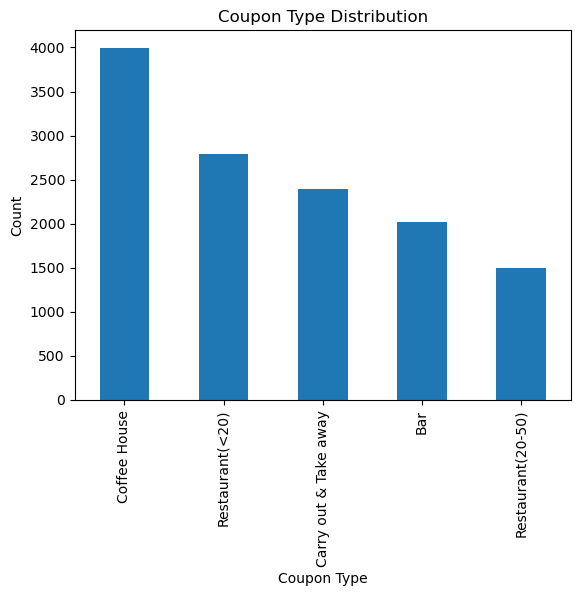

In [11]:
plt.figure()
(df_clean["coupon"]
 .value_counts()
 .sort_values(ascending=False)
 .plot(kind="bar"))
plt.title("Coupon Type Distribution")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.show()

6. Use a histogram to visualize the temperature column.

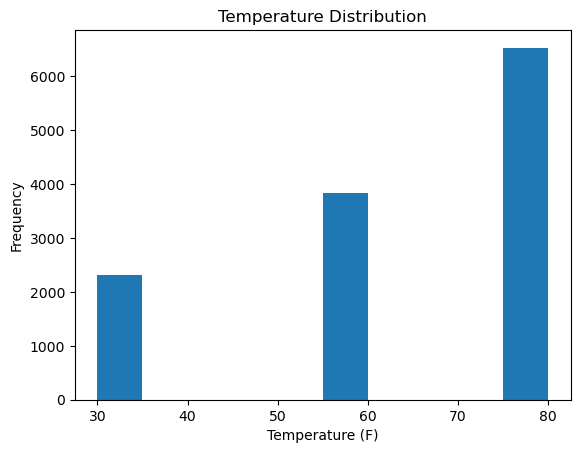

In [12]:
plt.figure()
df_clean["temperature"].dropna().plot(kind="hist")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
is_bar_coupon = df_clean["coupon"] == "Bar"
bar_df = df_clean[is_bar_coupon]

2. What proportion of bar coupons were accepted?


In [49]:
bar_accept_prop = bar_df["Y"].mean()
print(bar_accept_prop)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
bar_leq3 = bar_df[bar_df["Bar"].isin(["never", "less1", "1~3"])]
bar_gt3  = bar_df[bar_df["Bar"].isin(["4~8", "gt8"])]
bar_leq3_prop = bar_leq3["Y"].mean()
bar_gt3_prop  = bar_gt3["Y"].mean()

print(f"Proportion for ≤3 bar visits: {bar_leq3_prop:}")
print(f"Proportion for >3 bar visits: {bar_gt3_prop:}")

Proportion for ≤3 bar visits: 0.37061769616026713
Proportion for >3 bar visits: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
df_clean["age"] = pd.to_numeric(df_clean["age"])  
over_25_mask = df_clean["age"] > 25
freq_gt1_mask = df_clean["Bar"].isin(["4~8", "gt8"])
subset_over25_freq = df_clean[is_bar_coupon & over_25_mask & freq_gt1_mask]
subset_over25_freq_prop = subset_over25_freq["Y"].mean()
others_prop = df_clean[is_bar_coupon & ~(over_25_mask & freq_gt1_mask)]["Y"].mean()
print(f"Acceptance rate for people over 25 who frequently visit bars: {subset_over25_freq_prop:}")
print(f"Acceptance rate for all other bar coupon recipients: {others_prop:}")

Acceptance rate for people over 25 who frequently visit bars: 0.7768595041322314
Acceptance rate for all other bar coupon recipients: 0.3866033755274262


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
subset_q = (df_clean
            .query('coupon == "Bar"')
            .query('Bar in ["1~3","4~8","gt8"]')      
            .query('passanger != "Kid(s)"')
            .query('occupation != "Farming, Fishing & Forestry"'))

acceptance_rate = subset_q["Y"].mean()
bar_all = df_clean.query('coupon == "Bar"')
bar_baseline = bar_all["Y"].mean()

print(f"acceptance:{acceptance_rate:}")
print(f"Bar baseline:{bar_baseline:}")
print(f"Subset vs baseline:{acceptance_rate - bar_baseline:}")

acceptance:0.7132486388384754
Bar baseline:0.41001487357461575
Subset vs baseline:0.3032337652638597


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [40]:
prop = lambda q: df_clean.query(q)["Y"].mean()


groupA_prop = prop('coupon=="Bar" and Bar in ["4~8","gt8"] and passanger!="Kid(s)" and maritalStatus!="Widowed"')


groupB_prop = prop('coupon=="Bar" and Bar in ["4~8","gt8"] and age<30')


low_income = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]
groupC_prop = df_clean.query('coupon=="Bar" and RestaurantLessThan20 in ["4~8","gt8"] and income in @low_income')["Y"].mean()


rows += [
    ("Group A: >1/mo, no kids passenger, not widowed", groupA_prop),
    ("Group B: >1/mo, age < 30", groupB_prop),
    ("Group C: cheap restaurants >4/mo & income < 50K", groupC_prop),
]

bar_summary = pd.DataFrame(rows, columns=["Metric", "Proportion_Accepting"]).round(3)
display(bar_summary)

,Metric,Proportion_Accepting
0,"Group A: >1/mo, no kids passenger, not widowed",0.775
1,"Group B: >1/mo, age < 30",0.818
2,Group C: cheap restaurants >4/mo & income < 50K,0.453


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
The drivers who:
- frequently go to bars (more than 3x a week) 
- do not have kids
- are less then 30 years of age 
- are older than 25 years of age
are the drivers most likely to accept the bar coupons. 

Older drivers who:  
- do not go to bars often
- make less than $50k a year
- frequent cheap restaurants frequently 
are less likely to accept the bar coupons. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [42]:
coffee_df = df_clean[df_clean["coupon"].eq("Coffee House")]

In [43]:
coffee_accept_prop = coffee_df["Y"].mean()

In [66]:
coffee_by_time = (coffee_df.groupby("time")["Y"].mean()
                  .sort_values(ascending=False)
                 )
coffee_by_pass = (coffee_df.groupby("passanger")["Y"].mean()
                  .sort_values(ascending=False)
                 )
coffee_by_freq = (coffee_df.groupby("CoffeeHouse")["Y"].mean()
                  .sort_values(ascending=False)
                 )
coffee_by_weather = (coffee_df.groupby("weather")["Y"].mean()
                .sort_values(ascending=False)
                    )

coffee_by_age = (coffee_df.groupby("age")["Y"].mean()
                .sort_values(ascending=False)
                    )

coffee_by_dest = (coffee_df.groupby("destination")["Y"].mean()
               .sort_values(ascending=False)
                     )

print("Coffee coupons: overall acceptance =", round(coffee_accept_prop, 3), "\n")
print("Acceptance by time:\n", coffee_by_time, "\n")
print("Acceptance by passenger:\n", coffee_by_pass, "\n")
print("Acceptance by coffee visit frequency:\n", coffee_by_freq, "\n")
print("Acceptance by weather:\n", coffee_by_weather, "\n")
print("Acceptance by age:\n", coffee_by_age, "\n")
print("Acceptance by destination:\n", coffee_by_dest)

Coffee coupons: overall acceptance = 0.499 

Acceptance by time:
 time
10AM    0.640712
2PM     0.547859
7AM     0.445783
10PM    0.424242
6PM     0.412626
Name: Y, dtype: float64 

Acceptance by passenger:
 passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64 

Acceptance by coffee visit frequency:
 CoffeeHouse
4~8      0.685874
gt8      0.657895
1~3      0.647793
less1    0.481860
never    0.188781
Name: Y, dtype: float64 

Acceptance by weather:
 weather
Rainy    0.522124
Sunny    0.503605
Snowy    0.432343
Name: Y, dtype: float64 

Acceptance by age:
 age
21.0    0.524349
26.0    0.514828
46.0    0.513636
41.0    0.501538
31.0    0.476726
36.0    0.467662
Name: Y, dtype: float64 

Acceptance by destination:
 destination
No Urgent Place    0.580974
Work               0.445783
Home               0.362069
Name: Y, dtype: float64


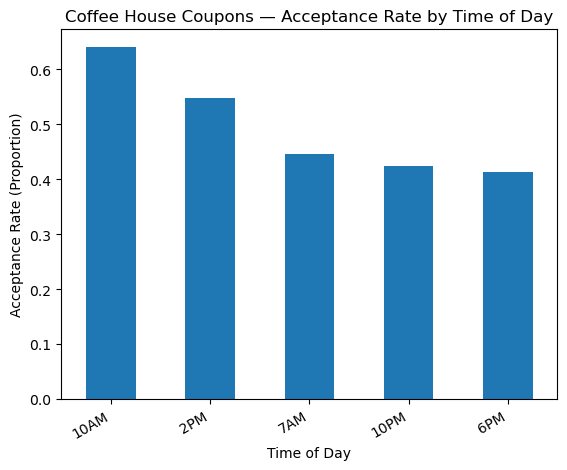

In [91]:
plt.figure()
coffee_by_time.plot(kind="bar")
plt.title("Coffee House Coupons — Acceptance Rate by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Acceptance Rate (Proportion)")
plt.xticks(rotation=30, ha="right")
plt.show()

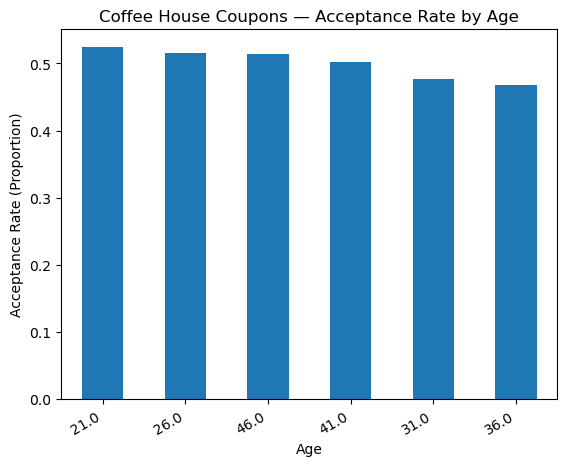

In [90]:
plt.figure()
coffee_by_age.plot(kind="bar")
plt.title("Coffee House Coupons — Acceptance Rate by Age")
plt.xlabel("Age")
plt.ylabel("Acceptance Rate (Proportion)")
plt.xticks(rotation=30, ha="right")
plt.show()

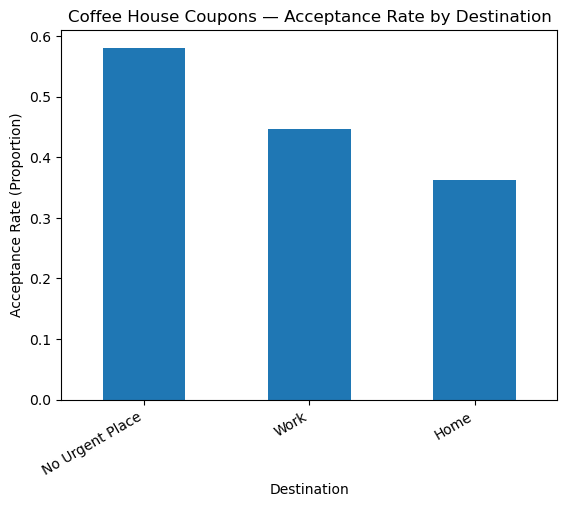

In [88]:
plt.figure()
coffee_by_dest.plot(kind="bar")
plt.title("Coffee House Coupons — Acceptance Rate by Destination")
plt.xlabel("Destination")
plt.ylabel("Acceptance Rate (Proportion)")
plt.xticks(rotation=30, ha="right")
plt.show()

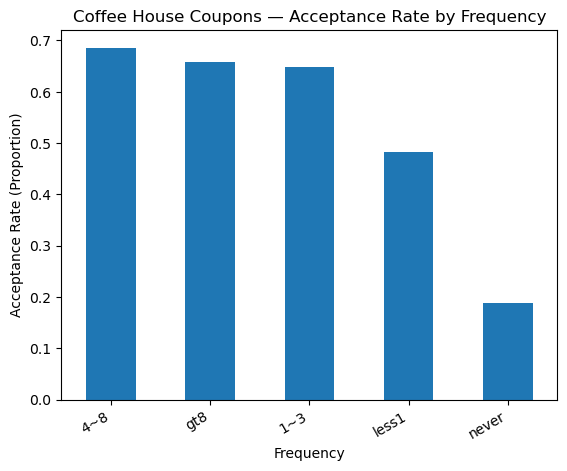

In [92]:
plt.figure()
coffee_by_freq.plot(kind="bar")
plt.title("Coffee House Coupons — Acceptance Rate by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Acceptance Rate (Proportion)")
plt.xticks(rotation=30, ha="right")
plt.show()

In [ ]:
The drivers who are most likely to accept the coffee house coupons are those who: 
- have a friend or partner as their passenger
- get coffee either in the morning or early afternoon (through around 2pm)
- had no urgent destination 
- get coffee frequently (at least 4 times a week) 

Those less likely to accept are: 
- on their way home
- alone or with a kid as passenger
- later in the day (late afternoon/evening)
- do not get coffee frequently